In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#set the working directory
%cd C:\Users\Panton\Desktop\ITZA\ITZA

C:\Users\Panton\Desktop\ITZA\ITZA


C:\Users\Panton\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [54]:
#read in the data
scores = pd.read_csv('clean_data/clean_scores.csv')

In [55]:
#check the distributions of columns
scores.describe()

,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [69]:
#create an average score column
all_classes = scores.loc[: , ['math_score', 'history_score', 'english_score','physics_score', 'chemistry_score', 'biology_score', 'geography_score']]
scores['average_score'] = all_classes.mean(axis = 1).round(2)
scores

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score,science_score,literature_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,82.00,85.00,80.5
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,91.43,94.00,87.0
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,86.43,87.50,87.0
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86,78.71,85.75,68.5
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,74.43,71.50,75.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82,79.71,78.50,80.5
1996,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73,76.29,78.25,66.0
1997,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78,82.57,75.50,89.5
1998,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75,80.86,82.75,92.0


In [70]:
#create a science and a literature column
science = scores.loc[:, ['physics_score', 'chemistry_score', 'biology_score', 'geography_score']]
lit = scores.loc[ :, ['history_score', 'english_score']]
scores['science_score'] = science.mean(axis = 1)
scores['literature_score'] = lit.mean(axis = 1)


In [71]:
#check top students for areas to explore further
sorted_scores = scores.sort_values(by='average_score', ascending=False)
top_students = sorted_scores.head(10)
top_students

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score,science_score,literature_score
796,female,False,3,True,35,Banker,87,99,99,100,98,96,94,96.14,97.75,97.5
779,male,False,6,False,35,Unknown,91,96,100,95,100,94,95,95.86,97.50,95.0
1573,female,True,2,False,48,Doctor,96,97,98,98,97,96,89,95.86,95.50,96.5
551,male,False,10,False,35,Software Engineer,93,100,90,94,97,98,98,95.71,94.75,99.0
1419,female,False,1,False,35,Designer,99,96,99,91,94,92,99,95.71,95.75,94.0
1122,male,False,2,False,35,Doctor,95,98,97,94,88,99,96,95.29,93.75,98.5
163,male,False,1,True,44,Doctor,86,100,100,96,95,97,93,95.29,96.00,98.5
985,male,False,2,True,35,Unknown,91,94,97,97,100,88,99,95.14,98.25,91.0
718,female,False,3,False,35,Software Engineer,99,95,89,90,95,98,99,95.00,93.25,96.5
541,male,False,2,False,35,Construction Engineer,96,90,91,95,99,95,99,95.00,96.00,92.5


In [72]:
#check bottom students for potential trends
sorted_scores_asc = scores.sort_values(by='average_score', ascending=True)
bottom_students = sorted_scores_asc.head(10)
bottom_students

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score,science_score,literature_score
1965,female,False,6,False,2,Business Owner,67,54,71,50,55,51,66,59.14,60.50,52.5
1661,male,True,6,False,5,Business Owner,41,53,64,62,79,50,65,59.14,67.50,51.5
906,female,False,6,False,4,Business Owner,84,54,52,52,65,54,69,61.43,59.50,54.0
527,female,False,3,True,1,Business Owner,50,55,96,72,55,50,64,63.14,71.75,52.5
819,male,True,2,True,2,Business Owner,46,71,60,50,85,69,62,63.29,64.25,70.0
767,male,False,6,False,3,Business Owner,48,72,64,65,64,55,79,63.86,68.00,63.5
432,male,False,9,False,4,Business Owner,48,55,86,51,54,94,61,64.14,63.00,74.5
271,female,False,7,False,4,Business Owner,44,64,58,66,87,62,68,64.14,69.75,63.0
867,male,True,4,False,5,Business Owner,52,65,74,71,63,59,67,64.43,68.75,62.0
1328,female,False,7,True,5,Business Owner,40,51,67,63,98,54,79,64.57,76.75,52.5


In [74]:
#check gender distribution
scores['gender'].value_counts()

female    1002
male       998
Name: gender, dtype: int64

In [75]:
#check career values
scores['career_aspiration'].value_counts()

Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: career_aspiration, dtype: int64

In [76]:
#check part time job distribution
scores['part_time_job'].value_counts()

False    1684
True      316
Name: part_time_job, dtype: int64

In [78]:
#check extra curricular activity distribution
scores['extracurricular_activities'].value_counts()

False    1592
True      408
Name: extracurricular_activities, dtype: int64

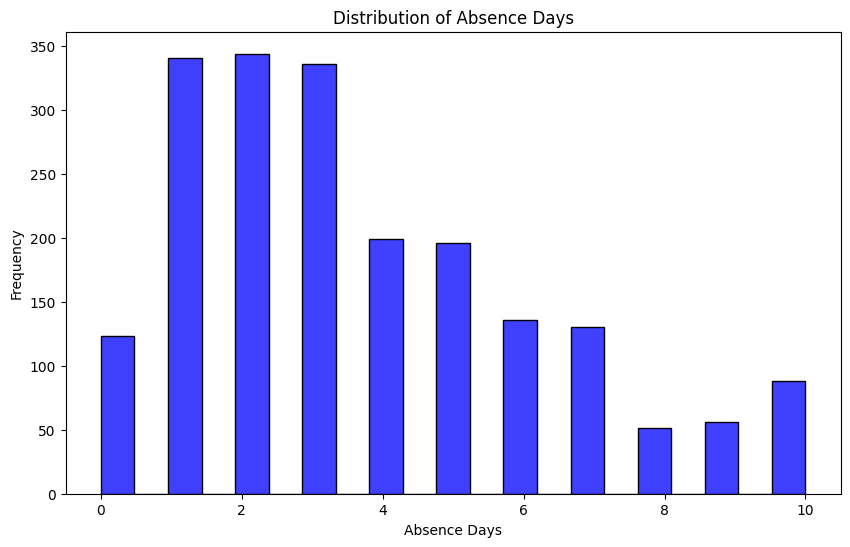

In [82]:
# absence days distribution
plt.figure(figsize=(10, 6))
sns.histplot(scores['absence_days'], color='blue')
plt.title('Distribution of Absence Days')
plt.xlabel('Absence Days')
plt.ylabel('Frequency')
plt.show()

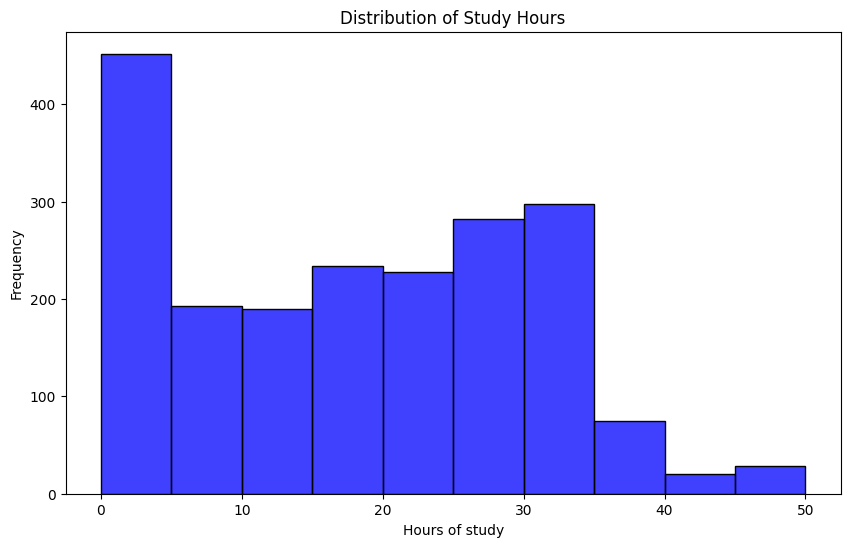

In [85]:
# Self study hours distribution
plt.figure(figsize=(10, 6))
sns.histplot(scores['weekly_self_study_hours'], color='blue', bins = 10)
plt.title('Distribution of Study Hours')
plt.xlabel('Hours of study')
plt.ylabel('Frequency')
plt.show()

In [92]:
#Create new column of hours studied in buckets
# Define the bins and labels for bucketing
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50']
scores['hours_studied_buckets'] = pd.cut(scores['weekly_self_study_hours'], bins=bins, labels=labels, right=False)


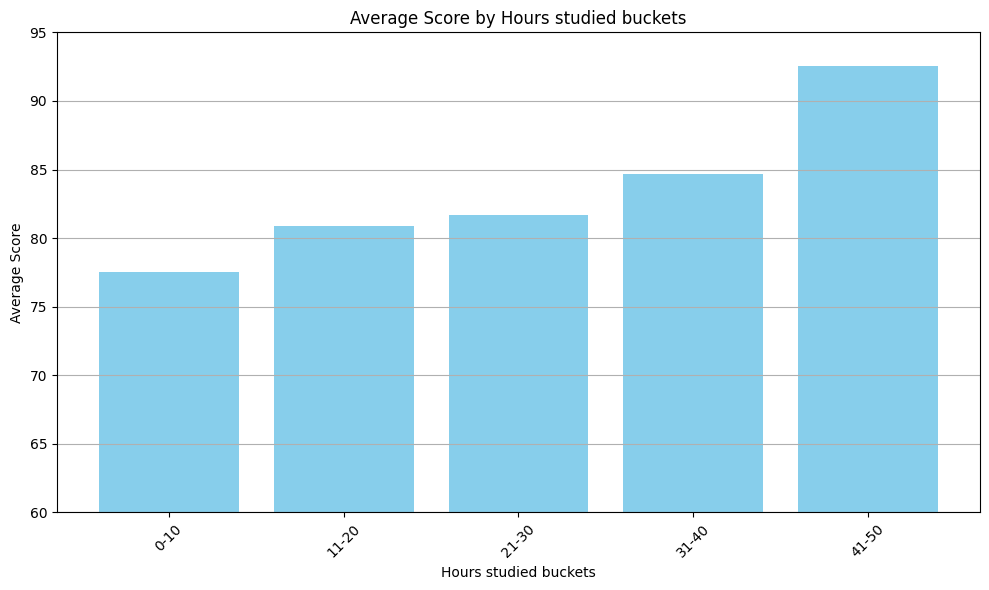

In [125]:
# group by hours studied buckets and calculate average score
grouped_scores = scores.groupby('hours_studied_buckets')['average_score'].mean().reset_index()

#Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_scores['hours_studied_buckets'], grouped_scores['average_score'], color='skyblue')
plt.xlabel('Hours studied buckets')
plt.ylabel('Average Score')
plt.title('Average Score by Hours studied buckets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.ylim(60, 95)
plt.grid(axis = 'y')
plt.savefig('documentation and analysis/visualisations/avg_buckets.png')
plt.show()

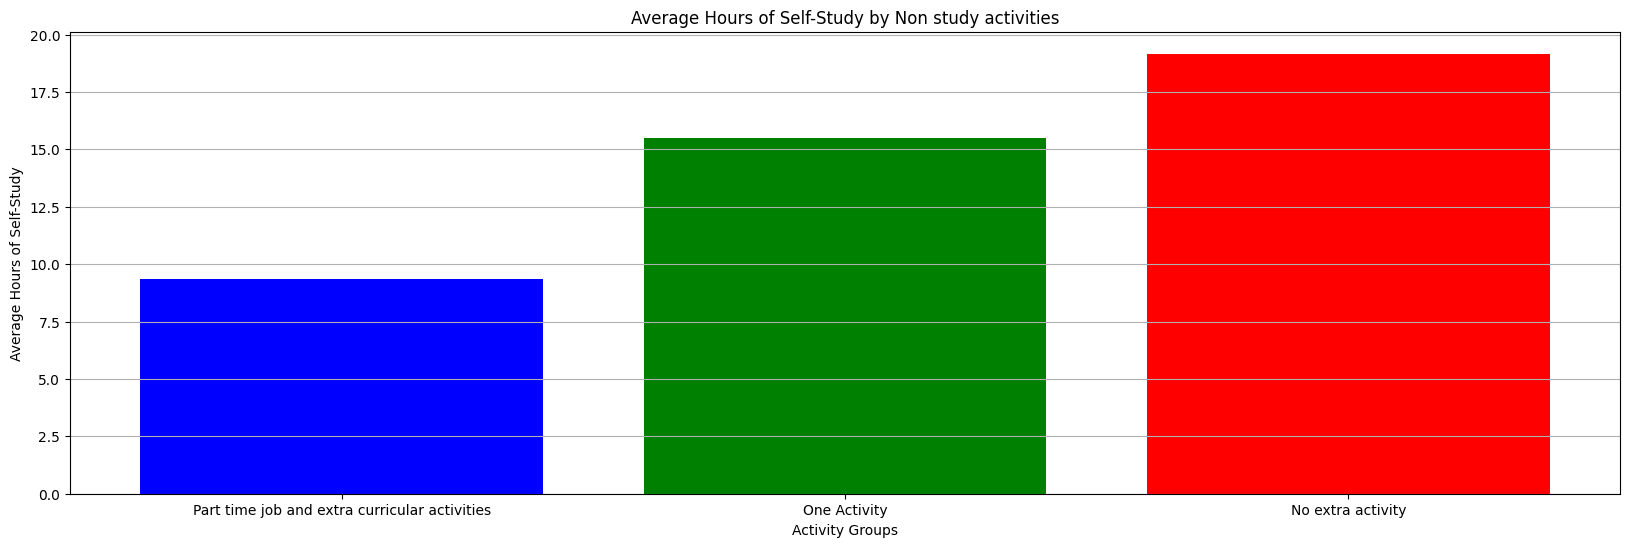

In [156]:
# Create separate scatter plots for each group
plt.figure(figsize=(20, 6))
# Calculate average hours of self-study for each group
avg_hours_both = scores[(scores['part_time_job']) & (scores['extracurricular_activities'])]['weekly_self_study_hours'].mean()
avg_hours_one = scores[((scores['part_time_job']) | (scores['extracurricular_activities'])) 
                      & ~((scores['part_time_job']) & (scores['extracurricular_activities']))]['weekly_self_study_hours'].mean()
avg_hours_none = scores[~((scores['part_time_job']) | (scores['extracurricular_activities']))]['weekly_self_study_hours'].mean()

# Create a bar plot
groups = ['Part time job and extra curricular activities', 'One Activity', 'No extra activity']
avg_hours = [avg_hours_both, avg_hours_one, avg_hours_none]

plt.bar(groups, avg_hours, color=['blue', 'green', 'red'])
plt.xlabel('Activity Groups')
plt.ylabel('Average Hours of Self-Study')
plt.title('Average Hours of Self-Study by Non study activities')
plt.grid(axis='y')
plt.savefig('documentation and analysis/visualisations/hours_of_study')
plt.show()

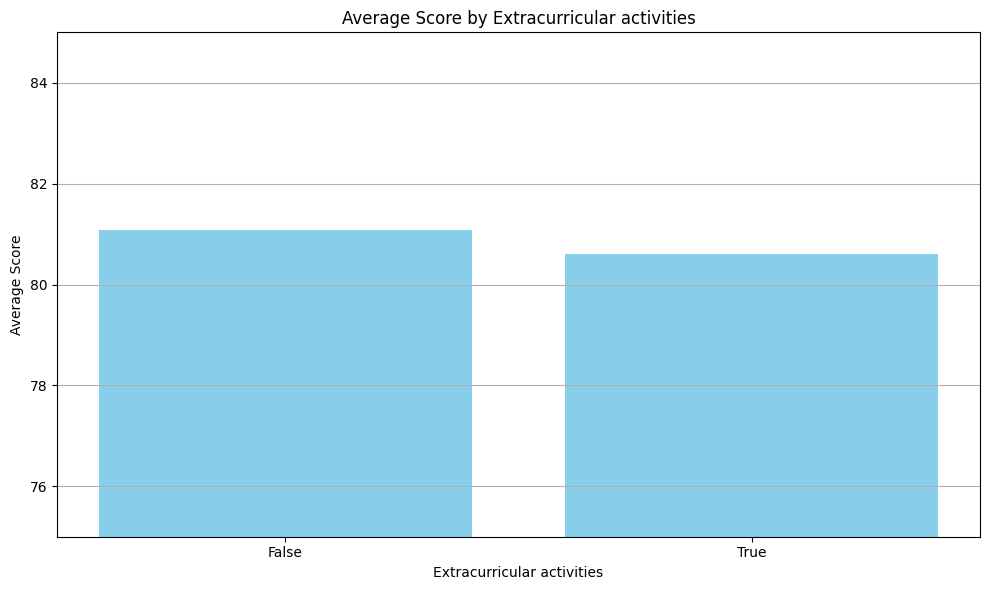

In [126]:
# group by extracurricular activities and calculate average score
grouped_scores_extra = scores.groupby('extracurricular_activities')['average_score'].mean().reset_index()

#Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_scores_extra['extracurricular_activities'], grouped_scores_extra['average_score'], color='skyblue')
plt.xlabel('Extracurricular activities')
plt.ylabel('Average Score')
plt.title('Average Score by Extracurricular activities')
plt.xticks([True, False], ['True', 'False'])
plt.tight_layout()
plt.ylim(75, 85)
plt.grid(axis = 'y')
plt.savefig('documentation and analysis/visualisations/avg_extra.png')
plt.show()

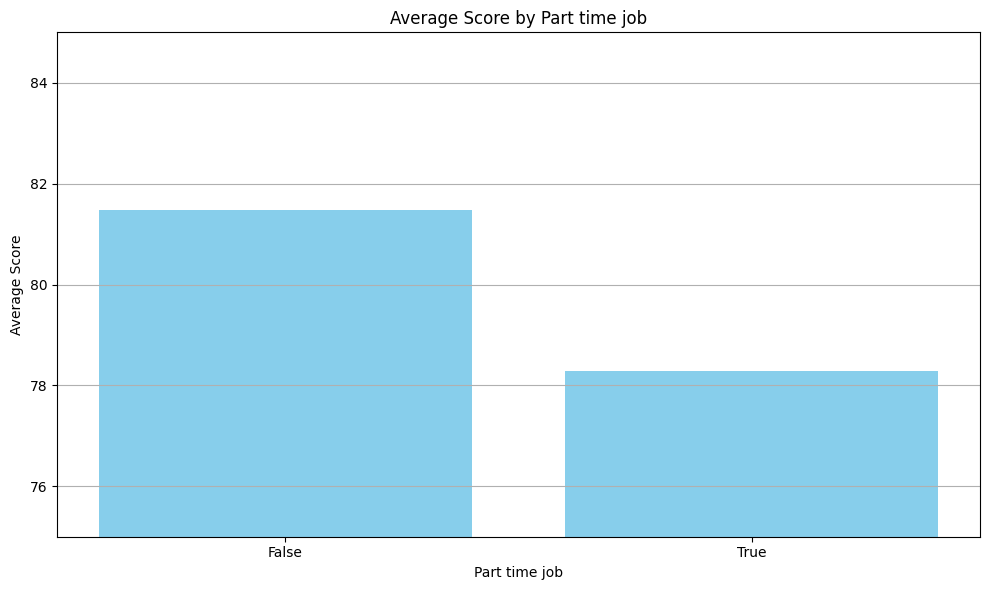

In [127]:
# group by part time job and calculate average score
grouped_scores_job = scores.groupby('part_time_job')['average_score'].mean().reset_index()

#Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_scores_job['part_time_job'], grouped_scores_job['average_score'], color='skyblue')
plt.xlabel('Part time job')
plt.ylabel('Average Score')
plt.title('Average Score by Part time job')
plt.xticks([True, False], ['True', 'False'])
plt.tight_layout()
plt.ylim(75, 85)
plt.grid(axis = 'y')
plt.savefig('documentation and analysis/visualisations/avg_job.png')
plt.show()

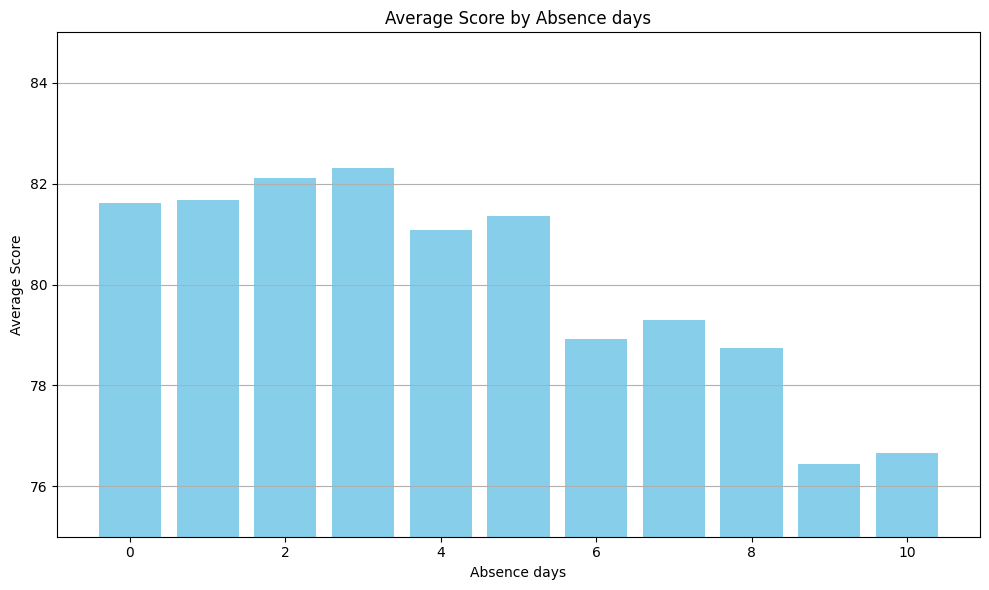

In [121]:
# group by absence days and calculate average score
grouped_scores_days = scores.groupby('absence_days')['average_score'].mean().reset_index()

#Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_scores_days['absence_days'], grouped_scores_days['average_score'], color='skyblue')
plt.xlabel('Absence days')
plt.ylabel('Average Score')
plt.title('Average Score by Absence days')
plt.tight_layout()
plt.ylim(75, 85)
plt.grid(axis = 'y')
plt.savefig('documentation and analysis/visualisations/avg_absence.png')
plt.show()


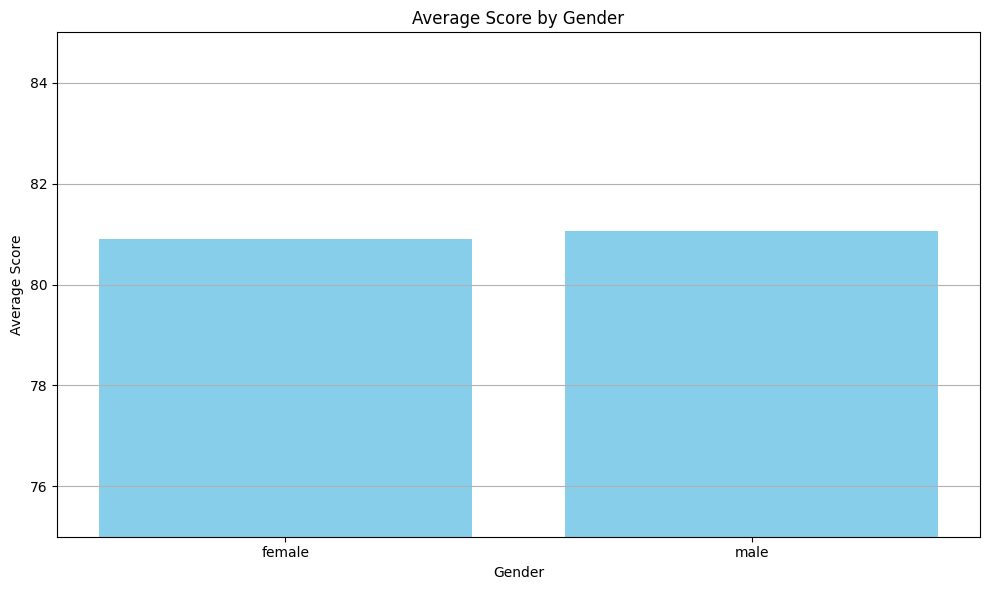

In [129]:
# group by gender and calculate average score
grouped_scores_gender = scores.groupby('gender')['average_score'].mean().reset_index()

#Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_scores_gender['gender'], grouped_scores_gender['average_score'], color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.title('Average Score by Gender')
plt.tight_layout()
plt.ylim(75, 85)
plt.grid(axis = 'y')
plt.savefig('documentation and analysis/visualisations/avg_gender.png')
plt.show()

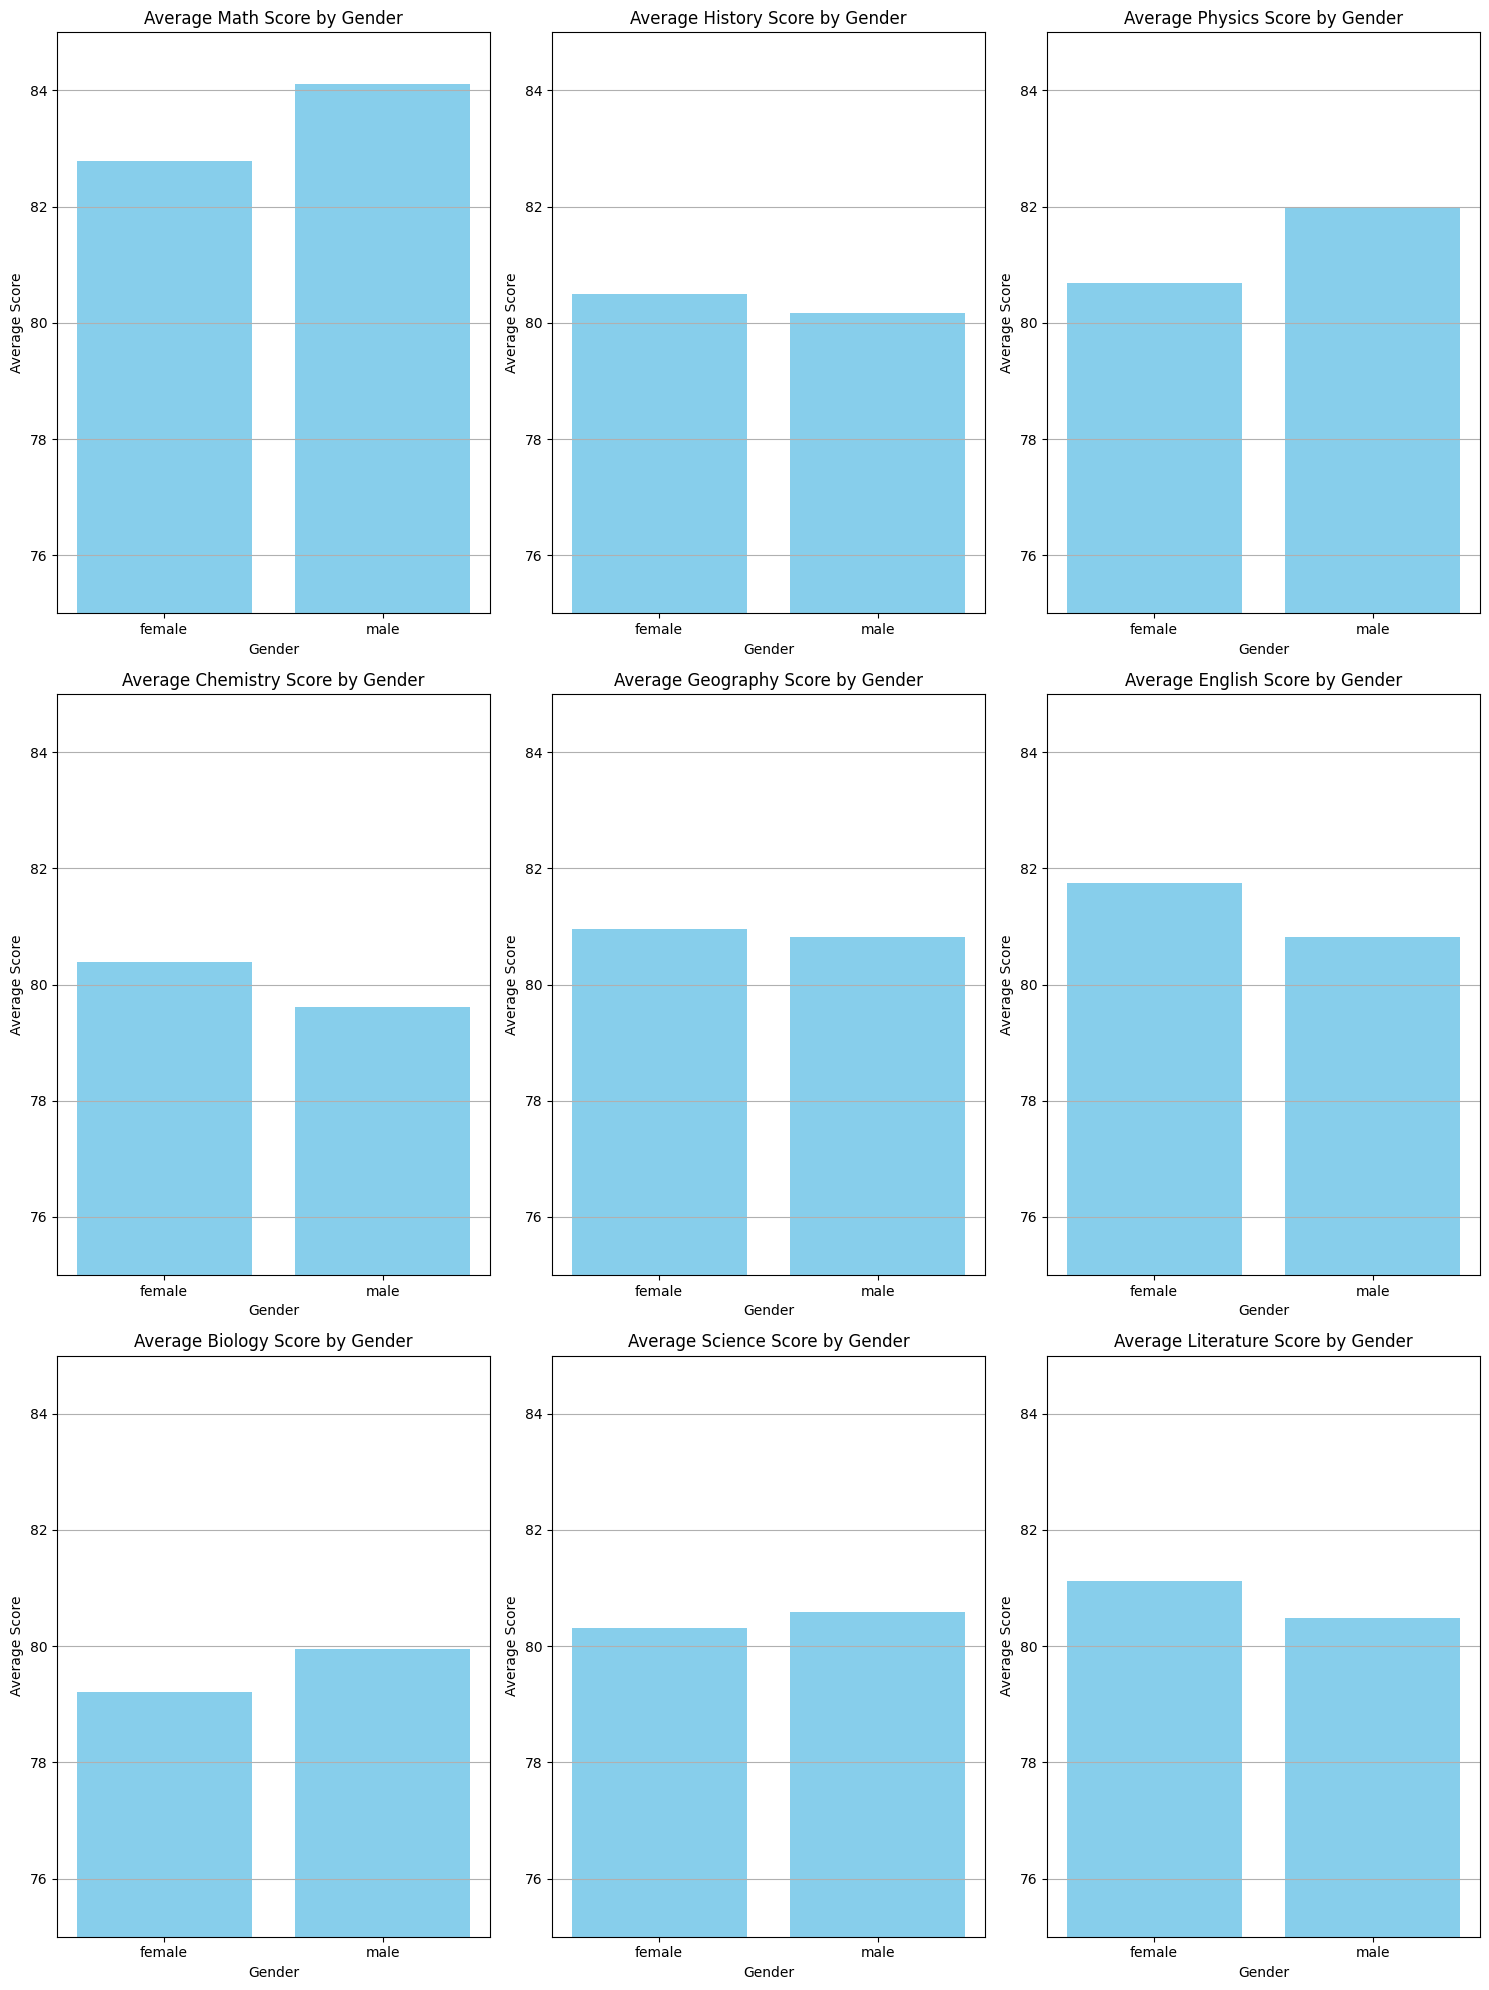

In [140]:
#list to iterate over
subjects = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'geography_score', 'english_score', 'biology_score', 'science_score', 'literature_score']


# Create subplots for each subject's average score
fig, axs = plt.subplots(3, 3, figsize=(15, 20))  # 4 rows, 2 columns

for i, subject in enumerate(subjects):
    row_num = i // 3  # Calculate row number
    col_num = i % 3   # Calculate column number
    
    # Group by gender and calculate average score for the subject
    grouped_scores_genders = scores.groupby('gender')[subject].mean().reset_index()
    
    # Plot the bar plot for the subject in the corresponding subplot
    axs[row_num, col_num].bar(grouped_scores_genders['gender'], grouped_scores_genders[subject], color='skyblue')
    axs[row_num, col_num].set_xlabel('Gender')
    axs[row_num, col_num].set_ylabel('Average Score')
    axs[row_num, col_num].set_title(f'Average {subject.replace("_", " ").title()} by Gender')
    axs[row_num, col_num].set_ylim(75, 85)  # Adjust y-axis limits as needed
    axs[row_num, col_num].grid(axis='y')  # Show only horizontal gridlines


plt.tight_layout()
plt.savefig('documentation and analysis/visualisations/avg_gender_subjects.png')
plt.show()


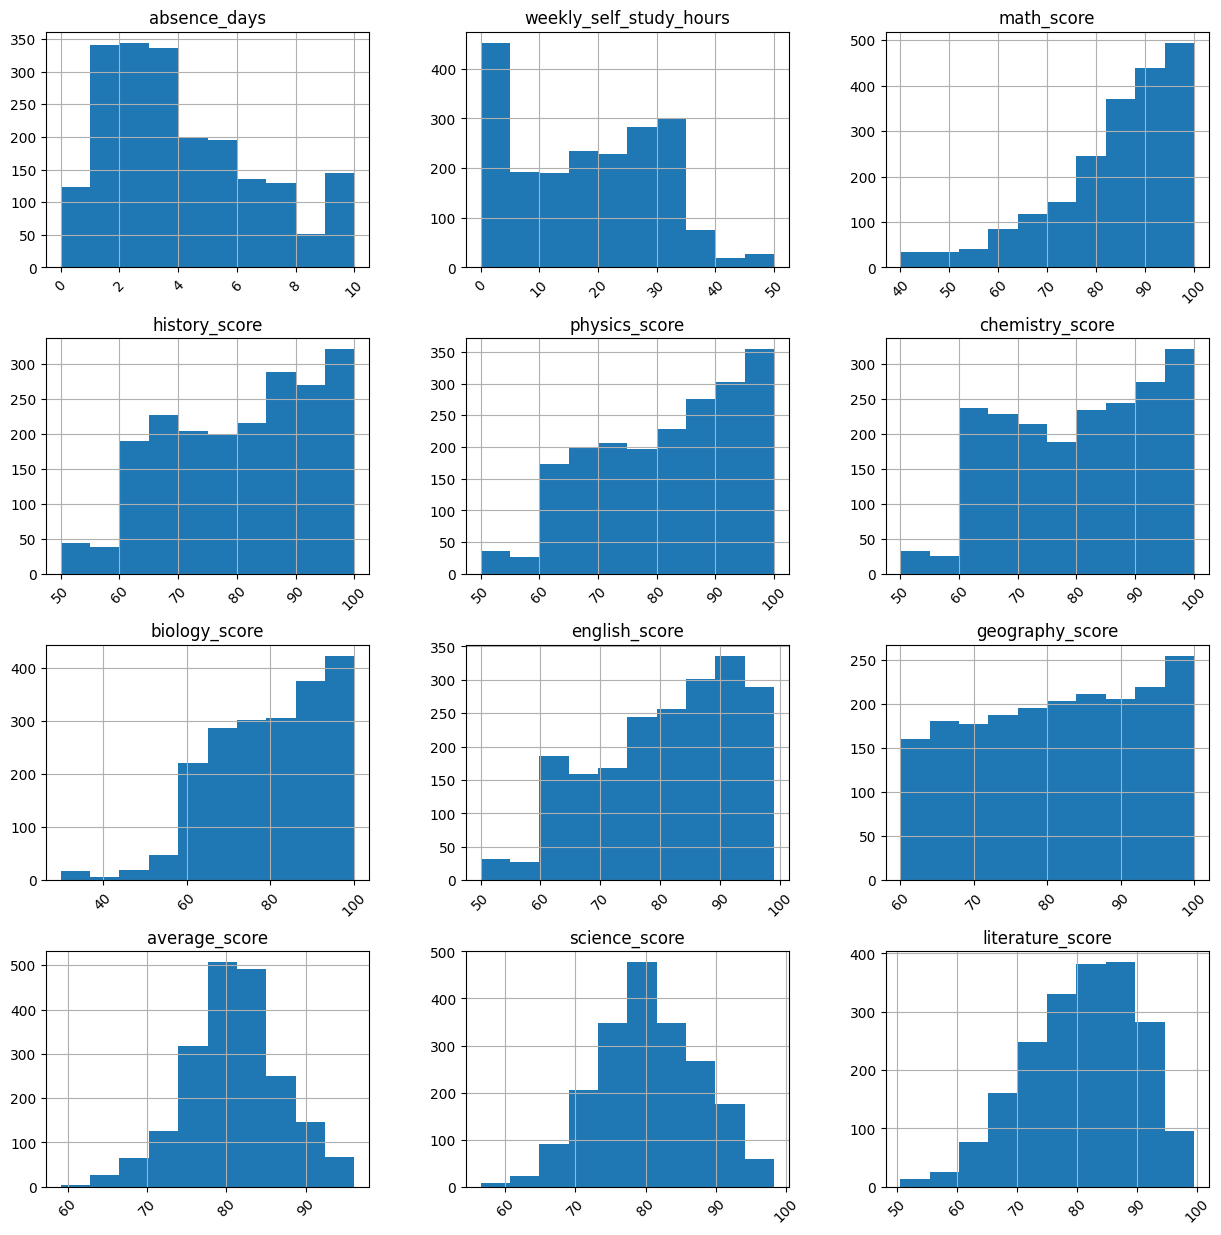

In [155]:
#histogram of all variables
scores.hist(figsize=(15,15),xrot=45 ,bins=10)
plt.savefig('documentation and analysis/visualisations/histogram_all.png')
plt.show()